In [3]:
import os
import boto3
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
s3 = boto3.client("s3")

filename = "weight-height.csv"
s3.download_file("sagemaker-ml-bucket-harini-2022", "training-data/weight-height.csv", filename)
data = pd.read_csv(filename)

In [7]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [9]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


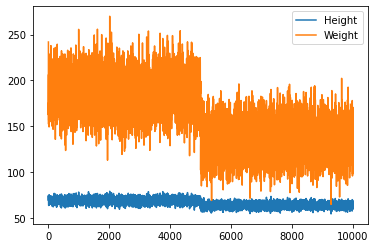

In [10]:
data.plot()

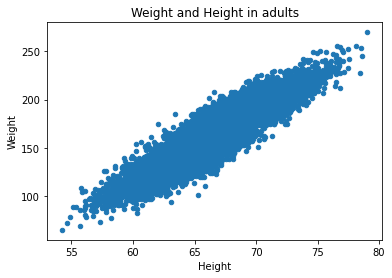

In [11]:
data.plot.scatter( x='Height', y='Weight',
         title='Weight and Height in adults')

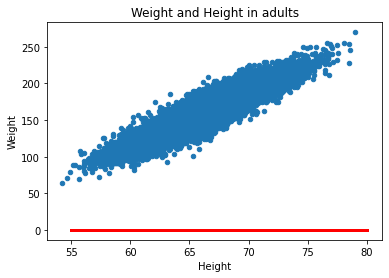

In [12]:
def line(x, w=0, b=0):
    return x * w + b

x = np.linspace(55, 80, 100)
yhat = line(x, w=0, b=0)

data.plot.scatter( x='Height', y='Weight',
         title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

In [13]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()